# Session 15
29/07/2021
## Multivariate Linear Regression (Direct Gradient)
1. Find gradient of Loss, L(W)  
2. Equate gradient to 0 to find the optimal weights.  
### Optimal weights:
####  $W = (X^{T}X)^{-1}X^{T}Y$


## Data Generation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

In [4]:
X, y, coeff =  make_regression(n_samples=100, n_features=3, coef=True, noise=5, random_state=4)
print(X.shape, y.shape)

(100, 3) (100,)


####  $W = (X^{T}X)^{-1}X^{T}Y$

In [29]:
# Training phase/ Training the LR model/ Find optimal weights
def fit(X, y):
    """
    X: Feature matrix: (n_samples, n_features)
    y: y_true: (n_samples,1)
    Returns: weights
    weights: optimal weights (n_features, 1)
    """
    X = X.copy()
    ones_column = np.ones((len(X),1))
    X = np.concatenate([ones_column, X], axis=1)

    w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return w

# prediction
def predict(X, w):
    """
    X: Feature matrix: (n_samples, n_features)
    w: weight vector: (n_fetures, 1)
    Returns:
    y: y_pred = X.w (n_samples,1)
    """
    X = X.copy()
    ones_column = np.ones((len(X),1))
    X = np.concatenate([ones_column, X], axis=1)

    return X.dot(w)

# r_squared
def r_squared(ytrue, ypred):
    e_method = ((ytrue-ypred)**2).sum() # sum of squares of residuals
    e_baseline = ((ytrue-ytrue.mean())**2).sum() # total sum of squares
    return 1 - e_method/e_baseline

# loss function
def loss(ytrue, ypred):
    return ((ytrue-ypred)**2).sum()

In [23]:
w = fit(X, y.reshape(-1,1))
print(w)

print(coeff)

[[ 0.33620963]
 [37.60607607]
 [80.10361202]
 [69.13352316]]
[37.32878322 80.34959994 69.50536772]


In [24]:
ypred = predict(X, w)

In [26]:
ypred.shape

(100, 1)

In [27]:
r_squared(y.reshape(-1,1), ypred)

0.9982165325526626

In [31]:
loss(y.reshape(-1,1), ypred)

2341.249275544616

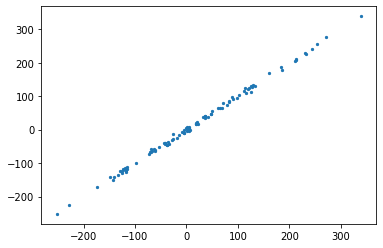

In [33]:
plt.scatter(ypred, y,  s=5)
plt.show()

In [34]:
# sum of residuals
(y.reshape(-1,1)-ypred).sum()

2.6645352591003757e-13

### Generate bivariate (n_features = 2) data

In [65]:
X, y, coeff =  make_regression(n_samples=100, n_features=2, coef=True, noise=0.5, bias=3, random_state=70)
print(X.shape, y.shape)

(100, 2) (100,)


In [66]:
y = y.reshape(-1,1)
print(y.shape)

(100, 1)


In [67]:
# Train the model/ learn the optimal weights
w = fit(X, y)
print(w)

print(coeff)



[[2.97437358]
 [0.53090801]
 [0.83536604]]
[0.58658289 0.92096177]


In [68]:
ypred = predict(X, w)

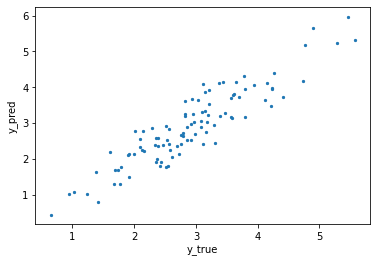

In [71]:
plt.scatter(ypred, y, s=5)
plt.xlabel("y_true")
plt.ylabel("y_pred")
plt.show()

In [70]:
r_squared(y, ypred)

0.8366747377246243

## Visualizing the Prediction plane
Dots represent actual data/ training data points  
But the corresponing prediciton will lie on the slant plane. This plane will be fixed once weights have been learnt.

In [72]:
from mpl_toolkits import mplot3d

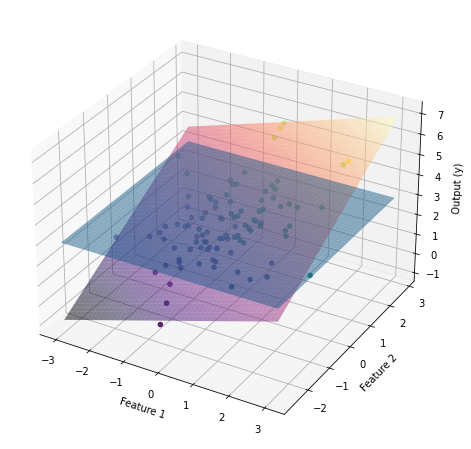

In [95]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

ax.scatter(X[:,0], X[:,1], y, c=y, cmap='viridis')


f1 = np.linspace(X[:,0].min(), X[:,0].max(), 50)
f2 = np.linspace(X[:,1].min(), X[:,1].max(), 50)

# blue plane parallel to x-y plane and at a height of 3 from origin 
f1, f2 = np.meshgrid(f1, f2)
z = np.ones(f1.shape)*3
ax.plot_surface(f1, f2, z, alpha=0.5)

# prediction plane
X_ = np.concatenate([f1.reshape(-1,1), f2.reshape(-1,1)], axis=1)
pred = predict(X_, w).reshape(f1.shape)
ax.plot_surface(f1, f2, pred, alpha=0.5, cmap='magma')

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Output (y)")

plt.savefig("prediction-plane.png", dpi=400)

In [92]:
# generate feature matrix for test data

X_ = np.concatenate([f1.reshape(-1,1), f2.reshape(-1,1)], axis=1)
print(X_.shape)

pred = predict(X_, w).reshape(f1.shape)
print(pred.shape, f1.shape)

(2500, 2)
(50, 50) (50, 50)


In [78]:
f1 = np.linspace(X[:,0].min(), X[:,0].max(), 50)
f2 = np.linspace(X[:,1].min(), X[:,1].max(), 50)

f1, f2 = np.meshgrid(f1, f2)
z = np.ones(f1.shape)*3

print(z, z.shape)


[[3. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]
 ...
 [3. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]
 [3. 3. 3. ... 3. 3. 3.]] (50, 50)


In [18]:
a = np.arange(0, 9).reshape(-1,3) # f mat
# print(a)
ones_column = np.ones((len(a),1))
# print(ones_column)
a = np.concatenate([ones_column, a], axis=1)

# fit(a, y[:3].reshape(-1,1))

# a.T.dot(a)

array([[ 3.,  9., 12., 15.],
       [ 9., 45., 54., 63.],
       [12., 54., 66., 78.],
       [15., 63., 78., 93.]])